In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df_jlcp = pd.read_excel("/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/JLCP/jlcp2021.xlsx")
df_org = pd.read_csv("/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/clean/org_data.csv")
df_jlcp=df_jlcp.rename(columns={'Performance year': 'year'}).rename(columns={'Stock code': 'code'})
df_merged = pd.merge(df_org, df_jlcp, on=['code', 'year'], how='inner')

In [7]:
year_count = df_merged.groupby('code')['year'].nunique().reset_index()
year_count.columns = ['code', 'year_count']
distribution = year_count['year_count'].value_counts().reset_index()
distribution.columns = ['year_count', 'code_count']

print(distribution)

    code  year_count
0   7003           2
1   7004           1
2   7007           1
3   7011           2
4   7012           1
..   ...         ...
79  7313           1
80  7314           1
81  7399           1
82  7404           1
83  7408           1

[84 rows x 2 columns]
   year_count  code_count
0           1          70
1           2          14


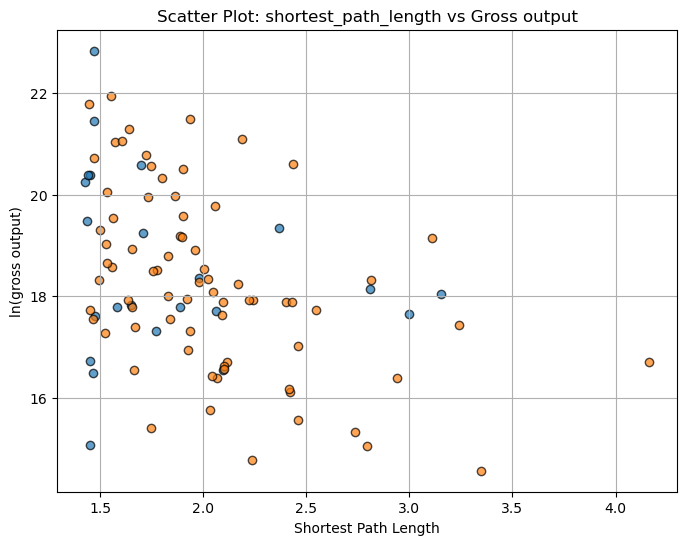

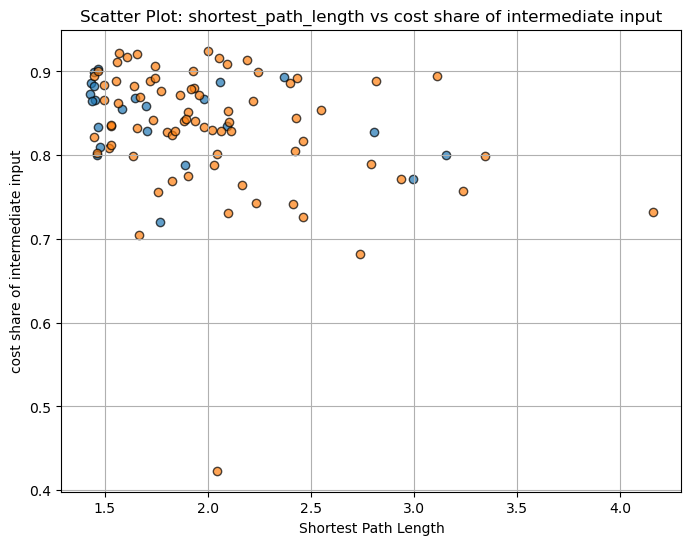

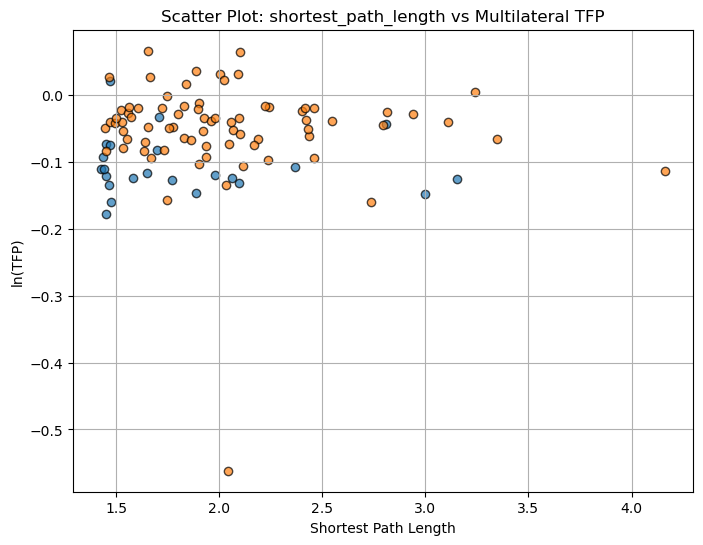

In [8]:
# function for scatter plot
def plot_scatter(x, y, x_label, y_label, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x[df_merged["year"]== 2002], y[df_merged["year"]== 2002], alpha=0.7, edgecolors='k')
    plt.scatter(x[df_merged["year"]== 2010], y[df_merged["year"]== 2010], alpha=0.7, edgecolors='k')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

# Gross output
plot_scatter(
    df_merged['shortest_path_length'],
    df_merged["ln(gross output)"],
    "Shortest Path Length",
    "ln(gross output)",
    "Scatter Plot: shortest_path_length vs Gross output"
)

# Cost share of intermediate-inputs
plot_scatter(
    df_merged['shortest_path_length'],
    df_merged['cost share of intermediate input'],
    "Shortest Path Length",
    "cost share of intermediate input",
    "Scatter Plot: shortest_path_length vs cost share of intermediate input"
)

# TFP
plot_scatter(
    df_merged['shortest_path_length'],
    df_merged['Multilateral TFP, base year=2011, industry=JIPcode'],
    "Shortest Path Length",
    "ln(TFP)",
    "Scatter Plot: shortest_path_length vs Multilateral TFP"
)


